# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience </a>

In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

## Задача 1
### Распределение Стьюдента


В `scipy.stats` распределение Стьюдента задается объектом `t` с параметрами:
 * `loc` и `scale` параметры распределения так же как и у нормального распределение
 * `df` число степеней свободы

Все остальные методы стандартные. Например, генерации выборки из распределения $T_{50}$ будет выглядеть так:


In [4]:
sps.t(df=50).rvs(4)

array([-0.55527506, -0.41052713, -0.27020116,  0.46166816])

Постройте на одном графике плотности распределения Стьюдента и нормального.


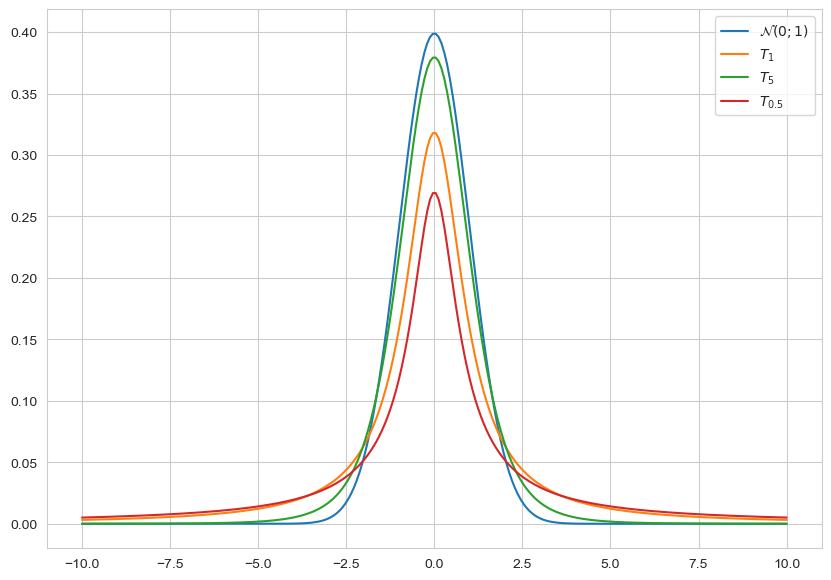

In [25]:
plt.figure(figsize=(10,7))
grid=np.linspace(-10,10,250)
plt.plot(grid, sps.norm.pdf(grid), label='$\mathcal{N}(0;1)$')
plt.plot(grid, sps.t(df=1).pdf(grid), label='$T_1$')
plt.plot(grid, sps.t(df=5).pdf(grid), label='$T_{5}$')
plt.plot(grid, sps.t(df=0.5).pdf(grid), label='$T_{0.5}$')
plt.legend()
plt.show()

Что вы можете сказать о скорости убывания "хвостов" данных распределений? Повлияет ли это на значения соответствующих квантилей?

**Ответ:** Скорость убывания хвостов в распределении Стьюдента монотонно растёт с ростом числа степеней свободы $k$. Конечно, же это отразится на значениии квантилей: чем быстрее убывают хвосты, тем меньше они по модулю.

### Квантили распределения Стьюдента

Для подсчета теоретических значений квантилей в модуле `scipy.stats` есть метод `.ppf`. На вход принимает параметр `alpha` - значение квантиля, а так же все параметры выбранного распределения.



In [11]:
sps.norm(loc=0, scale=1).ppf(0.05)

-1.6448536269514729

Для распределения Стьюдента нужно указать еще число степеней свобод.

In [14]:
sps.t(loc=0, scale=1, df=5).ppf(0.05)

-2.0150483726691575

Как мы видим, значения квантилей довольно сильно различаются. 

Возьмите `alpha` равное 95% и постройте график значений квантилей распределения стьюдента $T_{n-1,(1+\alpha)/2}$ от его степеней свобод. Так же нанесите на график значение квантиля нормального распределения $z_{(1+\alpha)/2}$

*Указание*: рассмотрите значения степеней свобод от 1 до 50.

In [35]:
alpha = 0.95
dfs = np.arange(1,51) # массив степеней свобод

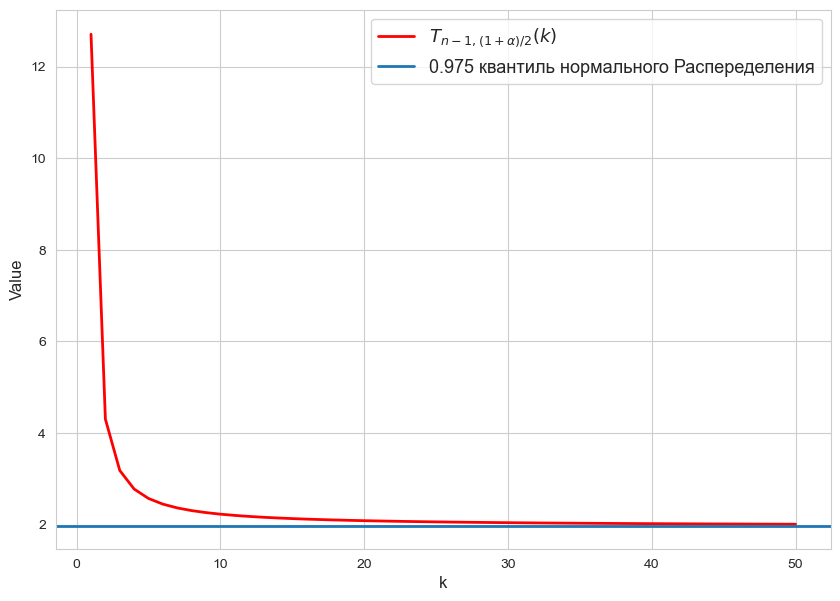

In [36]:
plt.figure(figsize=(10,7))
plt.plot(dfs, sps.t(loc=0, scale=1, df=dfs).ppf(0.975) , label=r'$T_{n-1,(1+\alpha)/2}(k)$', color='r', lw=2)

plt.axhline(sps.norm(loc=0, scale=1).ppf(0.975), label='0.975 квантиль нормального Распеределения', lw=2)
plt.xlabel('k', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=13)
plt.show()

Как изменяется поведение значения квантилей t распределения, есть ли у него какой-то предел?

**Ответ:** У t-распеределения есть предел. Оно асимтотически приближается к 0.975-му квантилю Стандартного нормального распределения.

### ДИ в нормальной модели
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимптотический доверительный интервал при помощи центральной предельной теоремы;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.


Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: $\theta\ \in\ \left( \overline{X} \pm \frac{z_{1+\frac{\alpha}{2}}}{\sqrt{n}}S \right)$

Точный доверительный интервал: $\theta\ \in\ \left( \overline{X} \pm \frac{T_{n-1, \frac{1+\alpha}{2}}}{\sqrt{n}}S \right)$



Постройте доверительные интервалы для параметра сдвига стандартного нормального распределения. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

*Указание*: рассмотрите длину выборки около 20-30.


In [132]:
sample_size = 30
sample = sps.norm.rvs(size=sample_size)  # выборка
h = np.arange(30)
asymptotic_ci = [sps.norm.ppf(0.975)/np.sqrt(k+1)*np.sqrt(np.var(sample[:k+1])) for k in h] # асимптотические ДИ

precise_ci =[sps.t(df=k+1).ppf(0.975)/np.sqrt(k+1)*np.sqrt(np.var(sample[:k+1])) for k in h]   # точные ДИ
for i in range(15, 30):
    print(f'k = {h[i]}', end=' ')
    print(f'asympthotic. right = {asymptotic_ci[i]:.3f}, precise. right = {precise_ci[i-1]:.3f}')
    print('-'*58)

k = 15 asympthotic. right = 0.480, precise. right = 0.515
----------------------------------------------------------
k = 16 asympthotic. right = 0.483, precise. right = 0.519
----------------------------------------------------------
k = 17 asympthotic. right = 0.456, precise. right = 0.520
----------------------------------------------------------
k = 18 asympthotic. right = 0.443, precise. right = 0.489
----------------------------------------------------------
k = 19 asympthotic. right = 0.422, precise. right = 0.473
----------------------------------------------------------
k = 20 asympthotic. right = 0.404, precise. right = 0.449
----------------------------------------------------------
k = 21 asympthotic. right = 0.396, precise. right = 0.428
----------------------------------------------------------
k = 22 asympthotic. right = 0.391, precise. right = 0.419
----------------------------------------------------------
k = 23 asympthotic. right = 0.377, precise. right = 0.412
------

Сравните полученные значения для доверительных интервалов.

**Ответ**: Видно, что асимтпотический интервал лежит внутри точного, то есть по модулю отклонение от ожидаемого больше для точного интервала, полученного с помощью распределения Стьюдента, что как раз согдасуется с полученными ранее результатами.

Реализуйте функции построения этих интервалов по выборке. Функции уже задокументированы.

Интервалы считайте по префиксам. Циклы использовать **запрещено**. Для подсчета среднего по префиксам используйте функцию `np.cumsum`.

In [133]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления асимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: асимптотический доверительный интервал
    '''
    n=np.arange(1,sample_size+1)
    means=np.cumsum(sample)/n
    delta=sps.norm.ppf((1+alpha)/2)/np.sqrt(n)*np.sqrt(np.cumsum(sample**2)-means**2)
    # ваш код
    return np.array([means-delta, means+delta])


def calculate_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления неасимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: неасимптотический доверительный интервал
    '''
    n=np.arange(1,sample_size+1)
    means=np.cumsum(sample)/n
    delta=sps.t(df=n+1).ppf((1+alpha)/2)/np.sqrt(n)*np.sqrt(np.cumsum(sample**2)-means**2)
    
    # ваш код
    return np.array([means-delta, means + delta])

Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассмотрите длину выборки около 20-30.

Чтобы не плодить код, допишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

*Подсказка:* вам может пригодиться функция `plt.fill_between`.


In [134]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None,
    ylim=(-10, 10), color_estimation='#FF3300', color_interval='#00CC66',
    color_sample='#0066FF', label_estimation='Оценка',
    sample_label='Семпл', interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''

    time = np.arange(len(left)) + 1

    assert len(time) == len(right)

    # ваш код
    plt.fill_between(x=time, y1=left, y2=right, label=interval_label, alpha=0.85)
    try:
        plt.plot(time, estimation, 'b', label='Estimation')
    except:
        pass

    plt.legend(fontsize=16)
    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.title('Зависимость значений \
доверительного интервала от размера выборки')
    plt.grid()

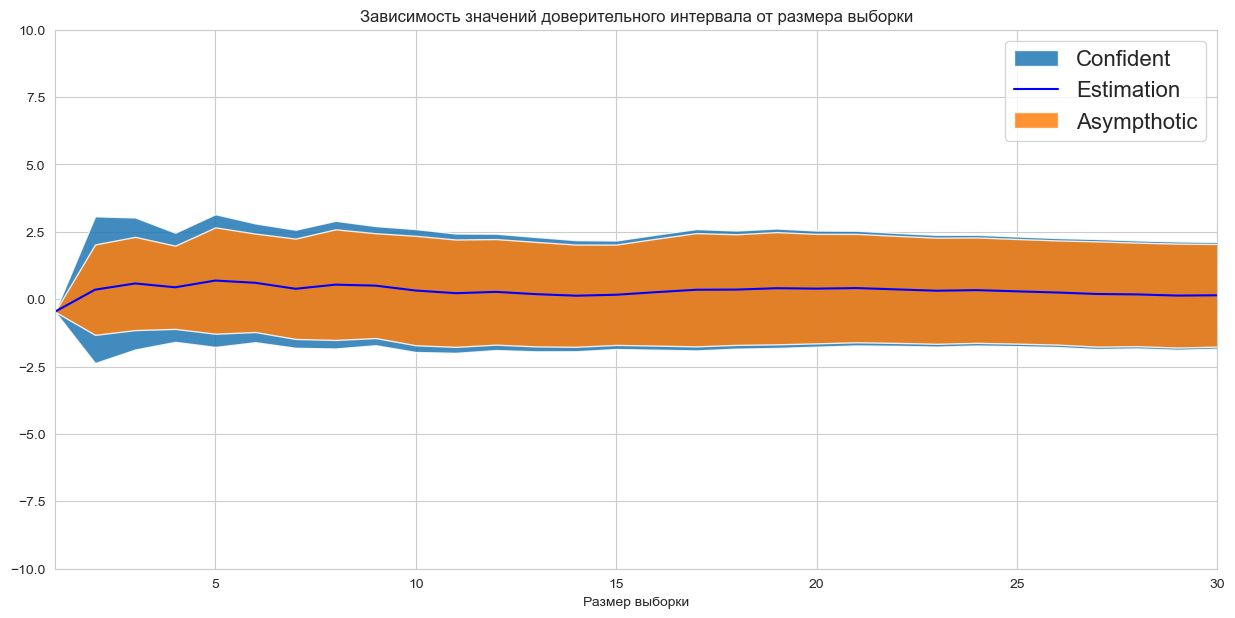

In [135]:
asy=calculate_asymptotic_confidence_intervals(sample)
conf=calculate_confidence_intervals(sample)
plt.figure(figsize=(15,7))
draw_confidence_interval(left=conf[0, :], 
                         right=conf[1, :], 
                         interval_label='Confident', 
                         estimation=np.cumsum(sample)/(1+np.arange(len(sample))))
draw_confidence_interval(left=asy[0, :], 
                         right=asy[1, :],
                         interval_label='Asympthotic')
plt.xlim(1, 30)
plt.show()

**Вывод:** Видно, что асимтотический доверительный интервал лежит внутри точного, и при увеличении размера выборки $n\ \to \infty$ они всё сильнее и сильнее совпадают. При этом уже начиная с размера $n\ \approx 15$ на графике они почти что неразличимы, а значит на практике можно использовать любой из них.


## Задача 2
### Функция правдоподобия
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [16]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.

    Аргументы:
    density_function --- функция, считающая плотность (обычную или дискретную).
        На вход данная функция должна принимать массив размера (1, len_sample)
        и возвращать массив размера (len_grid, len_sample).
    grid --- массив размера (len_grid, 1) --- сетка для построения графика;
    samples --- три выборки;
    label --- latex-код параметрической модели.
    """
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

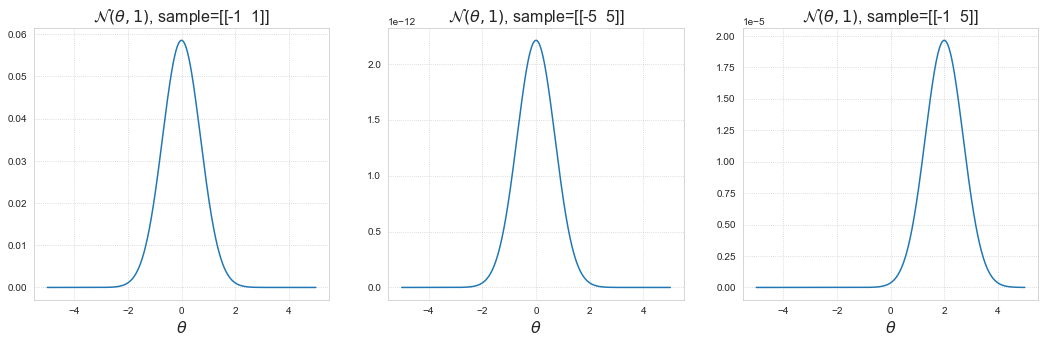

In [20]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

In [ ]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

*Примечание:* В выводе для каждой модели требуется описать, как меняются значения функции (сдвиг, масштаб, форма) при изменении выборки, где достигается максимум, а также какие значения параметра более правдоподобны для данной выборки, какие — менее.

**Вывод:**

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [22]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**


In [ ]:
# ваш код